In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


In [2]:
# This line reads a CSV file 
# and stores the data in a Pandas DataFrame called 'df'
df = pd.read_csv('BankChurners.csv') 


## **Database Info**

In [3]:
#returns the shape of the DataFrame 'df', which is the number of rows and columns 
df.shape 

(10127, 21)

In [4]:
#returns the column names of the DataFrame 'df'
df.columns 

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
#returns a concise summary of the DataFrame 'df', including the data type and 
# the number of non-null values for each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
#returns a statistical summary of the DataFrame 'df', including count, mean, standard deviation, minimum, maximum, and quartile values for numeric columns, and frequency count and mode for categorical columns
df.describe(include='all') 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,...,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,...,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [7]:
#returns the first five rows of the DataFrame 'df'
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
#returns the sum of null values for each column of the DataFrame 'df'
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# This line prints the unique values of the column 'Attrition_Flag' in the DataFrame 'df', 
# as well as the number of unique values
print('Attrition_Flag', df.Attrition_Flag.unique(), df.Attrition_Flag.nunique())

# This line prints the unique values of the column 'Gender' in the DataFrame 'df', 
# as well as the number of unique values
print('Gender', df.Gender.unique(), df.Gender.nunique())

# This line prints the unique values of the column 'Marital_Status' in the DataFrame 'df', 
# as well as the number of unique values
print('Marital_Status', df.Marital_Status.unique(), df.Marital_Status.nunique())

# This line prints the unique values of the column 'Income_Category' in the DataFrame 'df', 
# as well as the number of unique values
print('Income_Category', df.Income_Category.unique(), df.Income_Category.nunique())

# This line prints the unique values of the column 'Card_Category' in the DataFrame 'df', 
# as well as the number of unique values
print('Card_Category', df.Card_Category.unique(), df.Card_Category.nunique())



Attrition_Flag ['Existing Customer' 'Attrited Customer'] 2
Gender ['M' 'F'] 2
Marital_Status ['Married' 'Single' 'Unknown' 'Divorced'] 4
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 6
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum'] 4


## **DATA VISUALIZATION**

Histograms

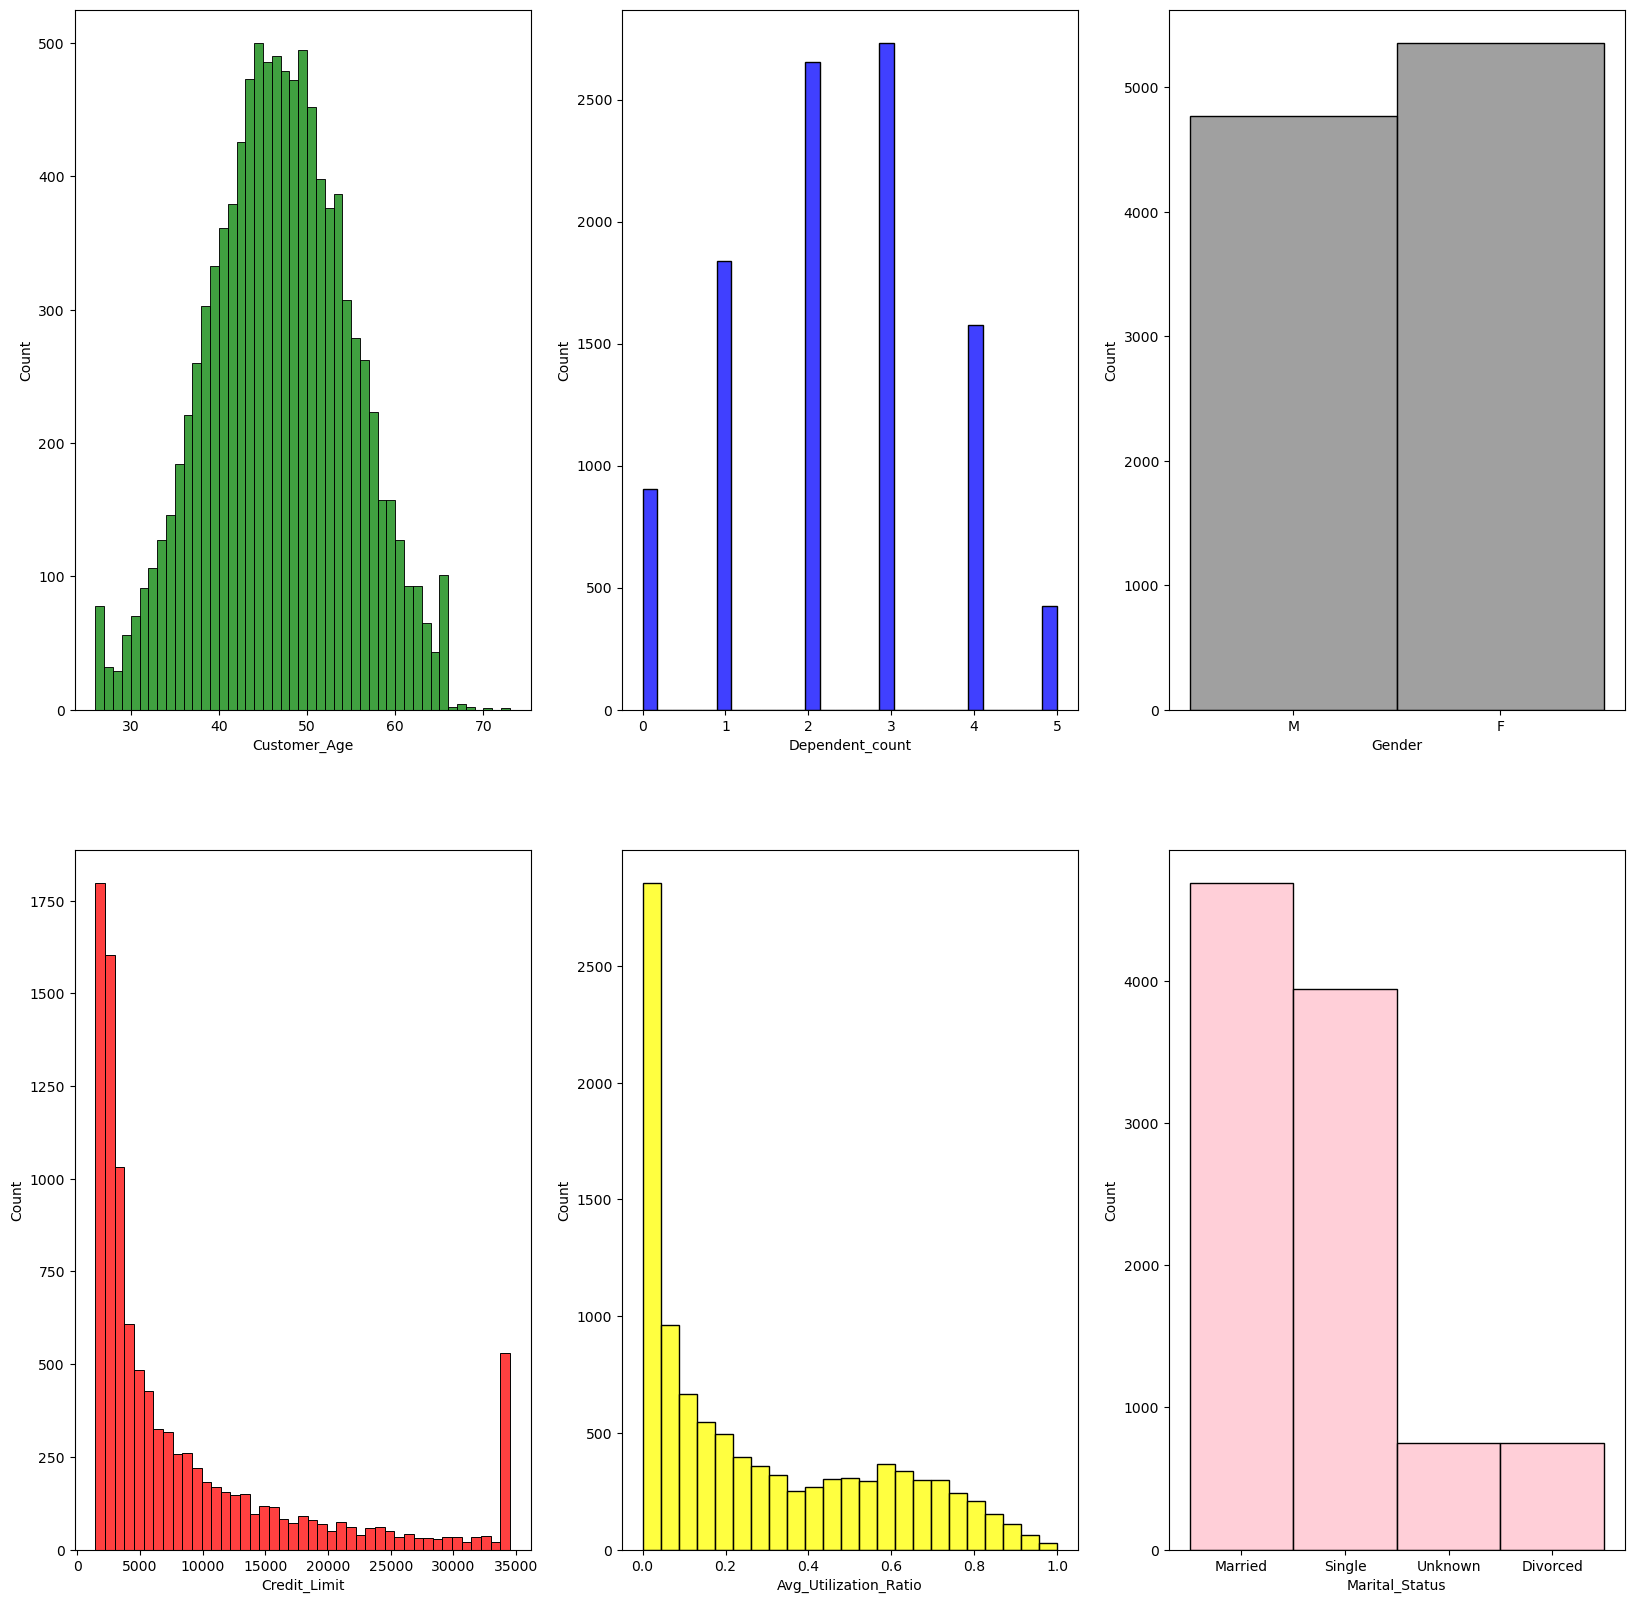

In [10]:
#creates a 2x3 grid of histograms of different columns from a pandas DataFrame 'df' using seaborn's histplot() function. 
#The histograms are plotted in a figure with a size of 20x20. The color of each histogram is also specified. 
#Finally, the plots are displayed using plt.show().
fig, axes = plt.subplots(2, 3, figsize=(20,20))
sns.histplot(data=df['Customer_Age'], ax=axes[0, 0],color='green')
sns.histplot(data=df['Dependent_count'], ax=axes[0, 1],color='Blue')
sns.histplot(data=df['Gender'], ax=axes[0, 2],color='gray')
sns.histplot(data=df['Credit_Limit'], ax=axes[1, 0],color='red')
sns.histplot(data=df['Avg_Utilization_Ratio'], ax=axes[1, 1],color='yellow')
sns.histplot(data=df['Marital_Status'], ax=axes[1, 2],color='pink')


plt.show()

**Heatmap**

In [11]:
# computes the correlation matrix of the columns in a pandas DataFrame 'df'
df.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


<AxesSubplot:>

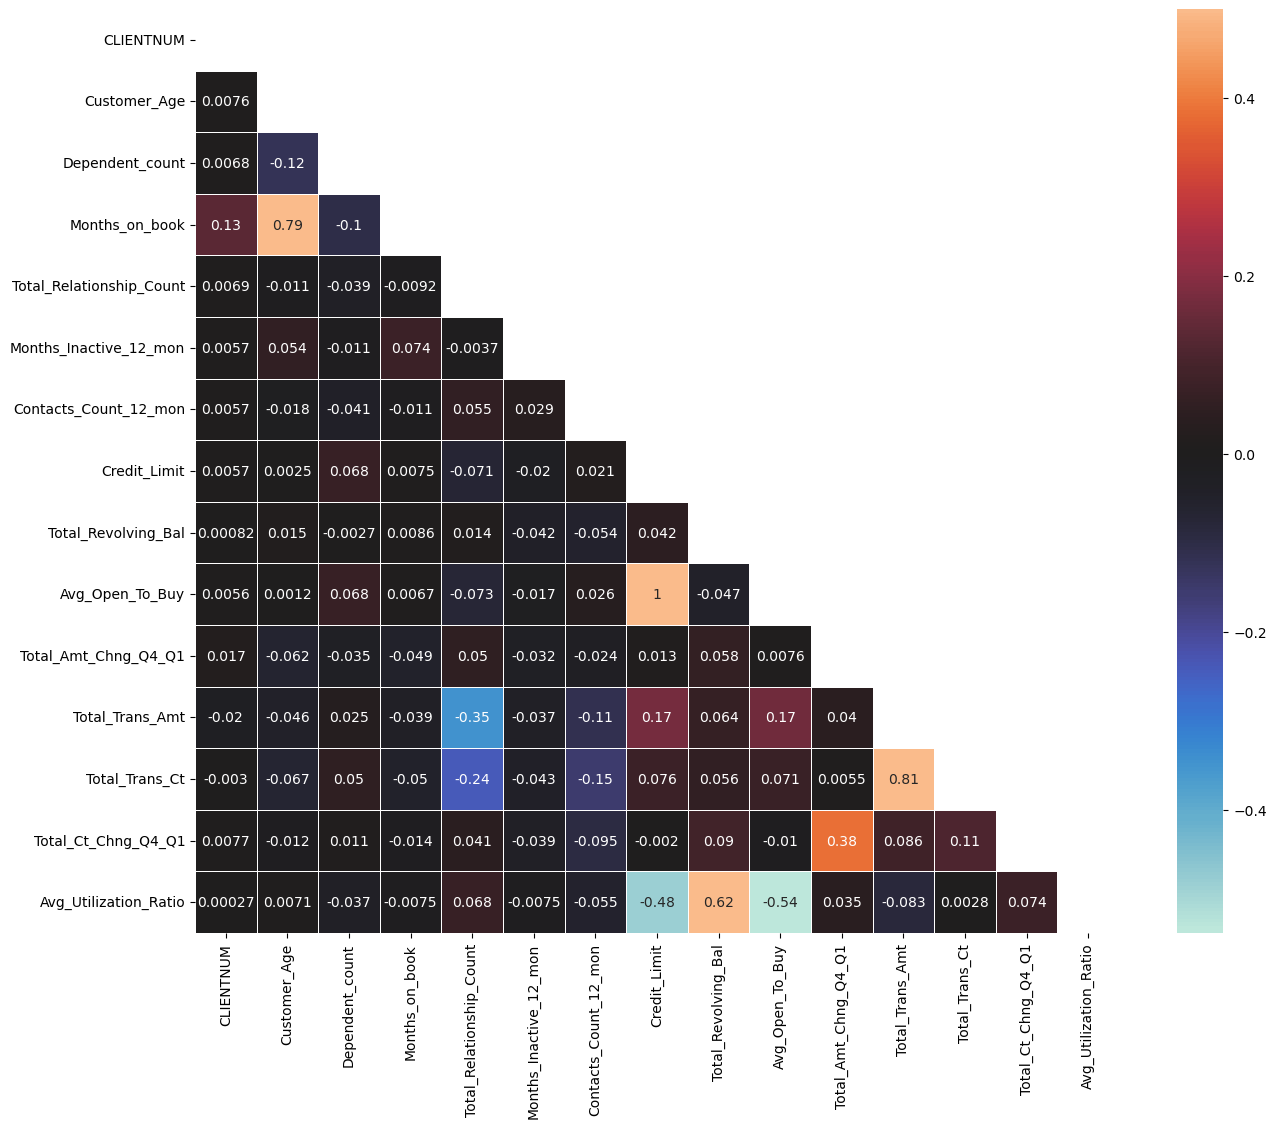

In [12]:
#heatmap
fig = plt.figure(figsize = (15,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, vmax=0.5, center=0, square=True, linewidths=.5, annot=True)

In [13]:
# encoder object knows how to understand word labels.
encoder = LabelEncoder()
  
# Encode labels in column 'Attrition_Flag'.
df['Attrition_Flag']= encoder.fit_transform(df['Attrition_Flag'])
# Encode labels in column 'Gender'.
df['Gender']= encoder.fit_transform(df['Gender'])
# Encode labels in column 'Education_Level'.
df['Education_Level']= encoder.fit_transform(df['Education_Level'])
# Encode labels in column 'Marital_Status'.
df['Marital_Status']= encoder.fit_transform(df['Marital_Status'])
# Encode labels in column 'Income_Category'.
df['Income_Category']= encoder.fit_transform(df['Income_Category'])
# Encode labels in column 'Card_Category'.
df['Card_Category']= encoder.fit_transform(df['Card_Category'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int32  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int32  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int32  
 8   Card_Category             10127 non-null  int32  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [15]:
x=df.iloc[:,2:] ## independent features
y=df.iloc[:,1] ## dependent features

In [16]:
model = ExtraTreesRegressor() # instance of the ExtraTreesRegressor
model.fit(x,y) #trained on the input data x and output data y using the fit method

ExtraTreesRegressor()

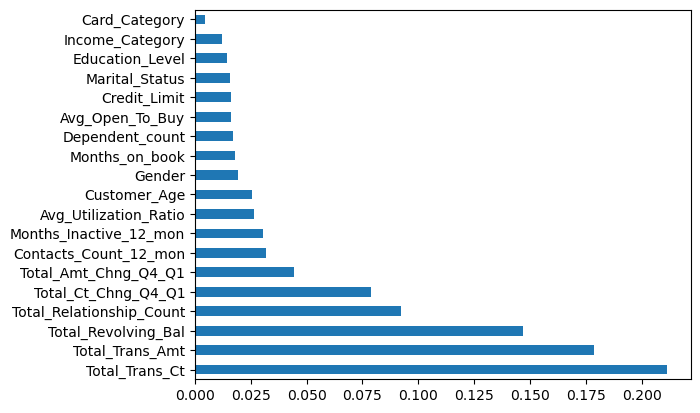

In [17]:
features = pd.Series(model.feature_importances_, index=x.columns) #pandas Series named "features" to store the feature importances obtained from an ExtraTreesRegressor model
features.nlargest(19).plot(kind='barh') #plots the top 19 features with the largest importances in a horizontal bar chart
plt.show()

## **Model Building**

In [18]:
x = df.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20]].values #numpy  array of independent variable. column Customer_Age and Avg_Open_To_Buy are dropped as they are highly correlated to variable Months_on_book and credit_limit respetively.
y = df.iloc[:,1].values # numpy array of Attrition_Flag
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1) #train_test_split function is used to split the dataset into training and testing data with a test size of 20% and a random state of 1. The training data consists of x_train and y_train, while the testing data consists of x_test and y_test.

In [19]:
models = [] #a list of models with their corresponding names is created and appended to the models list
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
#A loop is then created to iterate through each model, and for each model, cross-validation is performed using StratifiedKFold with 10 splits.
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy') #The cross_val_score() method is used to calculate the accuracy of each model, and the results are stored in the results list.
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) #The mean and standard deviation of the accuracy scores are printed for each model, along with the name of the model.

LR: 0.890258 (0.012256)
LDA: 0.901863 (0.009120)


C:\Users\riyad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\riyad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN: 0.892729 (0.012804)
CART: 0.933218 (0.005980)
NB: 0.889272 (0.013788)
RFC: 0.960992 (0.003837)


## **Hyperparameter Tuning**

In [20]:
#Creating a random_grid dictionary with hyperparameters for a Random Forest model.
#The n_estimators list contains 8 integers evenly spaced between 100 and 800, and the max_depth list contains 5 integers evenly spaced between 5 and 25. 
#These lists are then used to create a dictionary with keys 'n_estimators' and 'max_depth', and values set to the corresponding lists. 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               }

In [21]:
# Initializes a RandomizedSearchCV object for a RandomForestClassifier model.
# The hyperparameter distributions to search over are specified in the 'random_grid' dictionary, and the number of iterations to perform is set to 100. 
# The model will be evaluated using 5-fold cross-validation, with 'accuracy' used as the evaluation metric.
# The 'verbose' parameter is set to 2, so progress updates will be printed during the search.
# The 'n_jobs' parameter is set to -1, which means that all available CPU cores will be used for computation.
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,scoring='accuracy', n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)


In [22]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\riyad\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=0, scoring='accuracy', verbose=2)

In [23]:
# find the best hyperparameters for the RandomForestClassifier model
rf_random.best_params_

{'n_estimators': 200, 'max_depth': 25}

In [24]:
# Returns the mean cross-validated score of the best_estimator selected by RandomizedSearchCV
rf_random.best_score_

0.9606236814647261

In [25]:
# object to make predictions on the test data x_test
predictions=rf_random.predict(x_test)

In [26]:
#confusion matrix and accuracy
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[ 280   51]
 [  23 1672]]


0.9634748272458046

In [27]:
#Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       331
           1       0.97      0.99      0.98      1695

    accuracy                           0.96      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026

